## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [151]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [179]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./mod_3_chall/Resources/bitstamp.csv"), 
    index_col="Timestamp",
    infer_datetime_format=True, 
    parse_dates=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [180]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [181]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./mod_3_chall/Resources/coinbase.csv"), 
    index_col="Timestamp",
    infer_datetime_format=True, 
    parse_dates=True
)

In [182]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [183]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().mean()
bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [184]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")
bitstamp.dtypes

/var/folders/wg/rxr26bz92cd_v8nt046yvm800000gn/T/ipykernel_19748/2184011986.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [185]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [186]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
bitstamp.drop_duplicates()
bitstamp.head(10)

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
2018-01-01 00:05:00,13620.00,13634.15,13610.00,13610.00,4.716162,64226.303028,13618.341726
2018-01-01 00:06:00,13610.00,13650.18,13590.42,13600.56,26.432759,360108.155630,13623.555198
2018-01-01 00:07:00,13593.99,13595.41,13566.93,13580.00,10.674241,144961.611180,13580.507983
2018-01-01 00:08:00,13580.00,13580.00,13547.59,13579.00,19.322370,261942.833550,13556.454543


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [187]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum()
coinbase.dropna()

coinbase.dtypes
coinbase.duplicated().sum()
coinbase.drop_duplicates()
coinbase.tail(10)

coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.dtypes
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

/var/folders/wg/rxr26bz92cd_v8nt046yvm800000gn/T/ipykernel_19748/385226920.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [188]:
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [189]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, "Close"] 

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [190]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [191]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [192]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

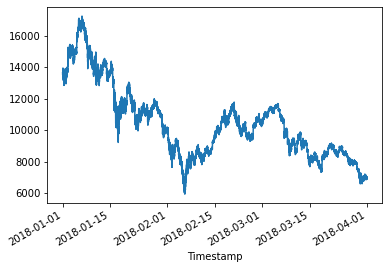

In [193]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot()

<AxesSubplot:xlabel='Timestamp'>

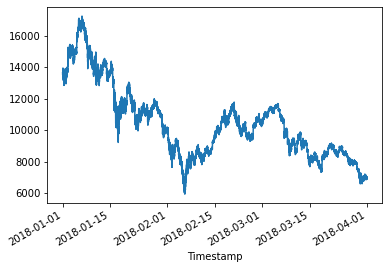

In [194]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot()

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

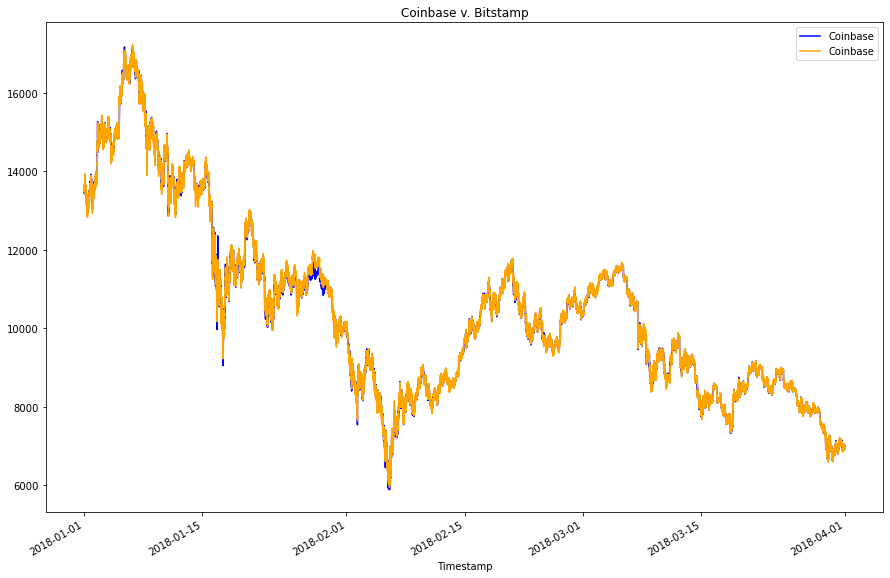

In [195]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase_sliced.plot(legend=True, figsize=(15, 10), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced.plot(legend=True, figsize=(15,10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

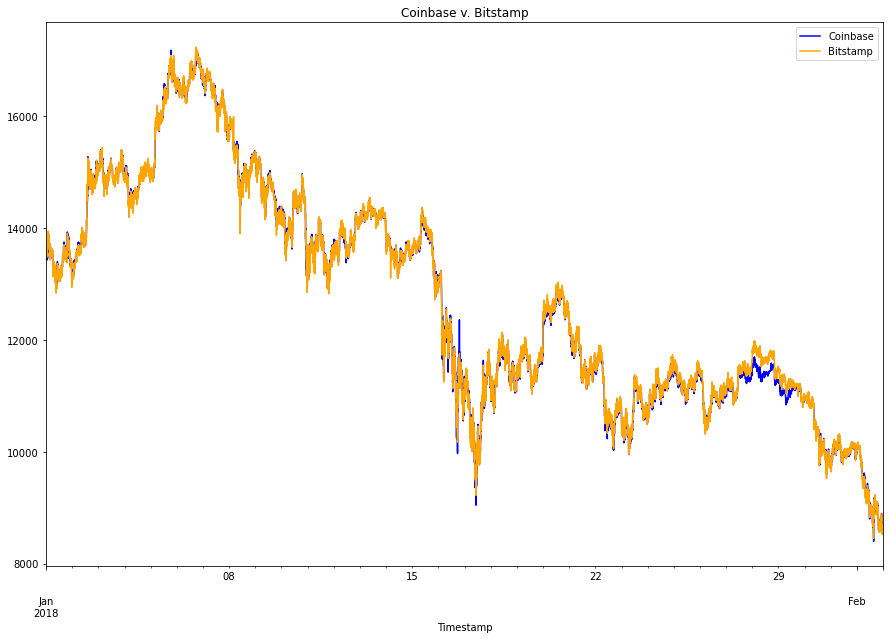

In [199]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase_sliced['2018-01-01': '2018-02-01'].plot(legend=True, figsize=(15, 10), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['2018-01-01': '2018-02-01'].plot(legend=True, figsize=(15,10), color="orange", label="Bitstamp")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

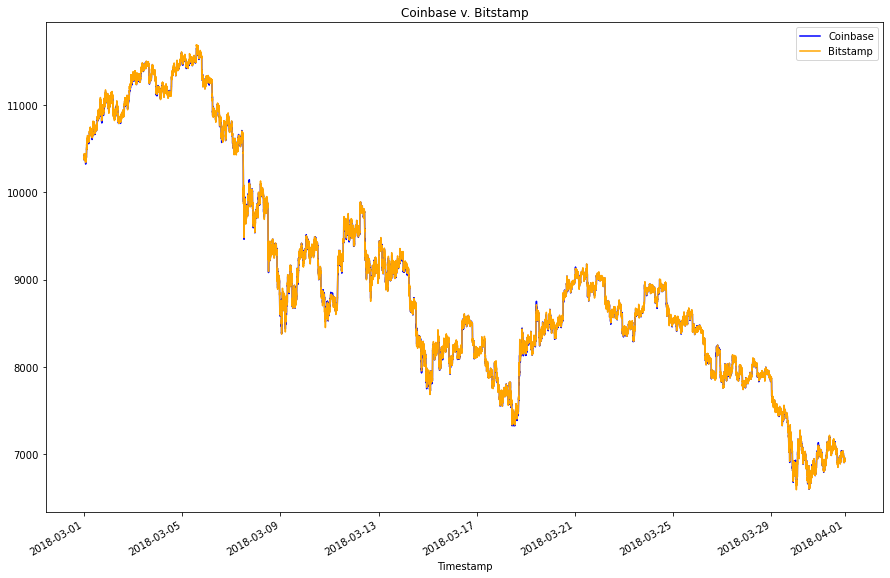

In [200]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
coinbase_sliced['2018-03-01': '2018-04-01'].plot(legend=True, figsize=(15, 10), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['2018-03-01': '2018-04-01'].plot(legend=True, figsize=(15,10), color="orange", label="Bitstamp")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

The degree of spread has stayed consistent throughout the dataset, except for some price differences in the middle of January and the end of January.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

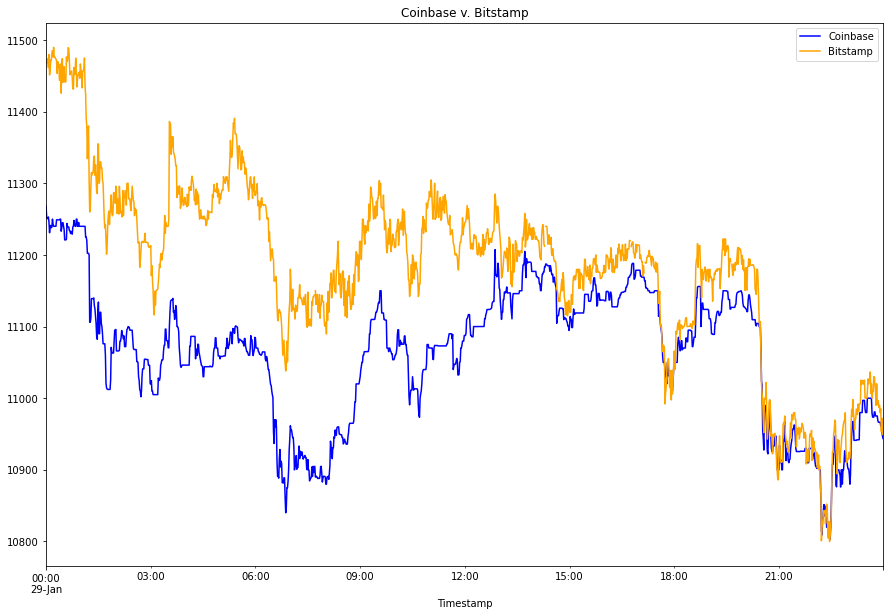

In [203]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced['2018-01-29'].plot(legend=True, figsize=(15, 10), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['2018-01-29'].plot(legend=True, figsize=(15,10), color="orange", label="Bitstamp")

In [208]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-29'] - coinbase_sliced.loc['2018-01-29']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

<AxesSubplot:>

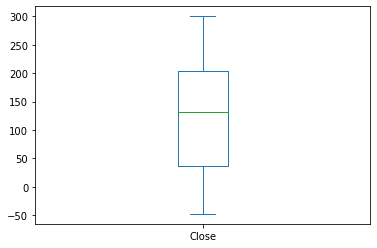

In [209]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

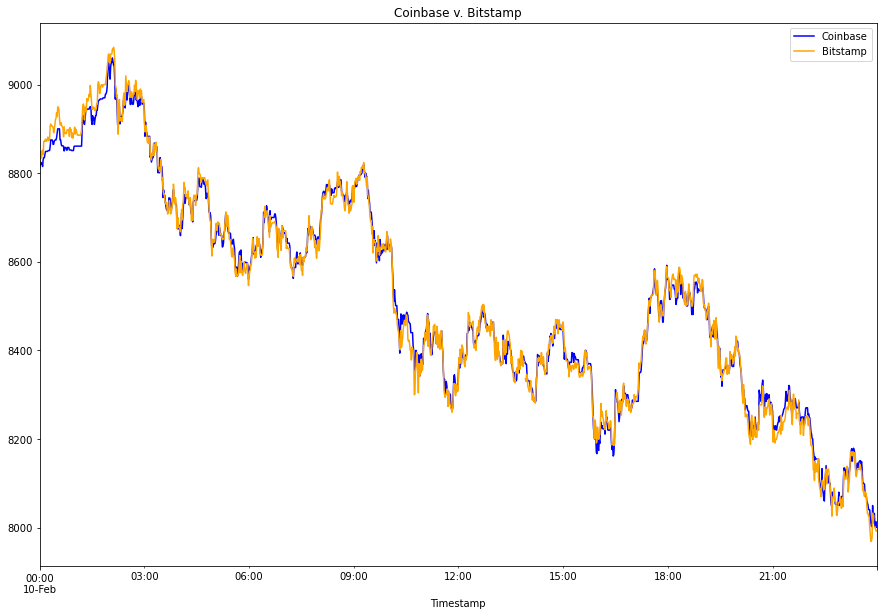

In [217]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced['2018-02-10'].plot(legend=True, figsize=(15, 10), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['2018-02-10'].plot(legend=True, figsize=(15,10), color="orange", label="Bitstamp")

In [218]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-10'] - coinbase_sliced.loc['2018-02-10']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean        0.364930
std        18.745766
min       -74.540000
25%       -12.180000
50%        -0.010000
75%        12.657500
max        56.130000
Name: Close, dtype: float64

<AxesSubplot:>

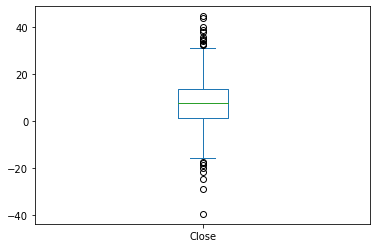

In [212]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

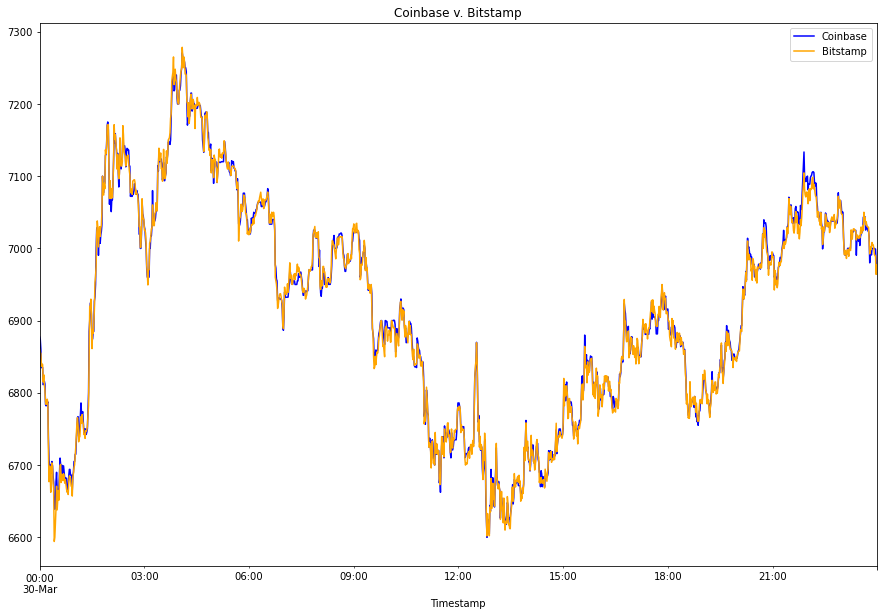

In [219]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase_sliced['2018-03-30'].plot(legend=True, figsize=(15, 10), title="Coinbase v. Bitstamp", color="blue", label="Coinbase")
bitstamp_sliced['2018-03-30'].plot(legend=True, figsize=(15,10), color="orange", label="Bitstamp")

In [220]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-30'] - coinbase_sliced.loc['2018-03-30']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean       -1.419507
std         8.918465
min       -56.920000
25%        -6.640000
50%        -1.205000
75%         4.412500
max        30.000000
Name: Close, dtype: float64

<AxesSubplot:>

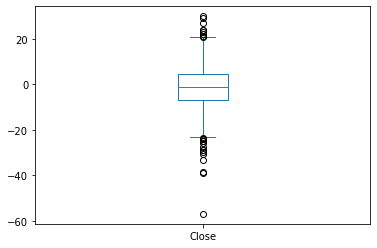

In [221]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [268]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-29'] - coinbase_sliced.loc['2018-01-29']
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-10'] - coinbase_sliced.loc['2018-02-10']
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-30'] - coinbase_sliced.loc['2018-03-30']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
early_greater_than_zero = arbitrage_spread_early[arbitrage_spread_early>0].describe()
middle_greater_than_zero = arbitrage_spread_middle[arbitrage_spread_middle>0].describe()
late_greater_than_zero = arbitrage_spread_late[arbitrage_spread_late>0].describe()

early_greater_than_zero, middle_greater_than_zero, late_greater_than_zero

(count    1379.000000
 mean      124.976425
 std        82.959829
 min         0.570000
 25%        41.885000
 50%       144.380000
 75%       204.135000
 max       300.270000
 Name: Close, dtype: float64,
 count    707.000000
 mean      15.588911
 std       11.599399
 min        0.010000
 25%        5.515000
 50%       13.160000
 75%       22.880000
 max       56.130000
 Name: Close, dtype: float64,
 count    635.000000
 mean       6.243102
 std        5.034210
 min        0.010000
 25%        2.455000
 50%        4.980000
 75%        8.735000
 max       30.000000
 Name: Close, dtype: float64)

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [269]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced.loc['2018-01-29']
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced.loc['2018-02-10']
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced.loc['2018-03-30']

# Review the spread return DataFrame
spread_return_early.head(10), spread_return_middle.head(10), spread_return_late.head(10)

(Timestamp
 2018-01-29 00:00:00    0.017609
 2018-01-29 00:01:00    0.018919
 2018-01-29 00:02:00    0.018941
 2018-01-29 00:03:00    0.019454
 2018-01-29 00:04:00    0.018203
 2018-01-29 00:05:00    0.020377
 2018-01-29 00:06:00    0.019240
 2018-01-29 00:07:00    0.018956
 2018-01-29 00:08:00    0.020134
 2018-01-29 00:09:00    0.020397
 Name: Close, dtype: float64,
 Timestamp
 2018-02-10 00:00:00    0.001264
 2018-02-10 00:01:00    0.001426
 2018-02-10 00:02:00    0.002769
 2018-02-10 00:03:00    0.001470
 2018-02-10 00:04:00    0.003091
 2018-02-10 00:05:00    0.004176
 2018-02-10 00:06:00    0.001176
 2018-02-10 00:07:00    0.004103
 2018-02-10 00:08:00    0.004143
 2018-02-10 00:09:00    0.003383
 Name: Close, dtype: float64,
 Timestamp
 2018-03-30 00:00:00         NaN
 2018-03-30 00:01:00         NaN
 2018-03-30 00:02:00         NaN
 2018-03-30 00:03:00    0.000231
 2018-03-30 00:04:00    0.000725
 2018-03-30 00:05:00    0.000588
 2018-03-30 00:06:00    0.000553
 2018-03-30 00:0

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [280]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head(10)

Timestamp
2018-01-29 00:00:00    0.017609
2018-01-29 00:01:00    0.018919
2018-01-29 00:02:00    0.018941
2018-01-29 00:03:00    0.019454
2018-01-29 00:04:00    0.018203
2018-01-29 00:05:00    0.020377
2018-01-29 00:06:00    0.019240
2018-01-29 00:07:00    0.018956
2018-01-29 00:08:00    0.020134
2018-01-29 00:09:00    0.020397
Name: Close, dtype: float64

In [281]:
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_middle.head(10)

Series([], Name: Close, dtype: float64)

In [282]:
profitable_trades_late = spread_return_late[spread_return_late > .01]
profitable_trades_late.head(10)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [285]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe(), profitable_trades_middle.describe(), profitable_trades_late.describe()

(count    741.000000
 mean       0.017485
 std        0.003024
 min        0.010003
 25%        0.015157
 50%        0.017908
 75%        0.019671
 max        0.026361
 Name: Close, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64)

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [289]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced
profit_mid = profitable_trades_middle * bitstamp_sliced
profit_late = profitable_trades_late * bitstamp_sliced

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_mid = profit_mid.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_early.head(10), profit_per_trade_mid.head(10), profit_per_trade_late.head(10)

(Timestamp
 2018-01-29 00:00:00    201.98
 2018-01-29 00:01:00    217.00
 2018-01-29 00:02:00    217.22
 2018-01-29 00:03:00    223.22
 2018-01-29 00:04:00    208.64
 2018-01-29 00:05:00    233.92
 2018-01-29 00:06:00    220.32
 2018-01-29 00:07:00    217.20
 2018-01-29 00:08:00    230.98
 2018-01-29 00:09:00    233.99
 Name: Close, dtype: float64,
 Series([], Name: Close, dtype: float64),
 Series([], Name: Close, dtype: float64))

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [290]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe(), profit_per_trade_mid.describe(), profit_per_trade_late.head(10)

(count    741.000000
 mean     196.839190
 std       34.485134
 min      111.200000
 25%      170.120000
 50%      201.010000
 75%      221.010000
 max      300.270000
 Name: Close, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64,
 Series([], Name: Close, dtype: float64))

<AxesSubplot:title={'center':'Early Year Bitcoin Profits'}, xlabel='Timestamp'>

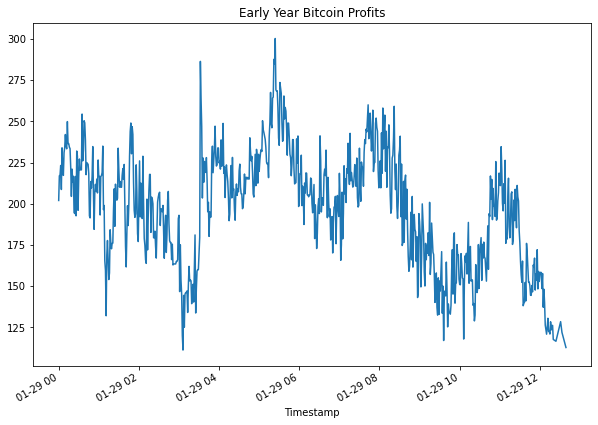

In [294]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,7), title="Early Year Bitcoin Profits")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [296]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum(), profit_per_trade_mid.sum(), profit_per_trade_late.sum()

(145857.83999999997, 0.0, 0.0)

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [297]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_mid = profit_per_trade_mid.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

(<AxesSubplot:xlabel='Timestamp'>,
 <AxesSubplot:xlabel='Timestamp'>,
 <AxesSubplot:xlabel='Timestamp'>)

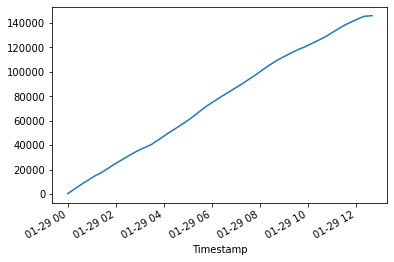

In [299]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(), cumulative_profit_mid.plot(), cumulative_profit_late.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
The trend was in the beginning of the year profits were high because of a greater arbitrage rate, but very quickly people caught on and the differences in profit evened out as the months went by into April of 2018.